## WHAT IS THE DIFFERENCE BETWEEN CATEGORICAL, ORDINAL AND INTERVAL VARIABLES?
In talking about variables, sometimes you hear variables being described as categorical (or sometimes nominal), or ordinal, or interval.  Below we will define these terms and explain why they are important.

### Categorical or nominal
A categorical variable (sometimes called a nominal variable) is one that has two or more categories, but there is no intrinsic ordering to the categories.  For example, a binary variable (such as yes/no question) is a categorical variable having two categories (yes or no) and there is no intrinsic ordering to the categories.  Hair color is also a categorical variable having a number of categories (blonde, brown, brunette, red, etc.) and again, there is no agreed way to order these from highest to lowest.  A purely nominal variable is one that simply allows you to assign categories but you cannot clearly order the categories.  If the variable has a clear ordering, then that variable would be an ordinal variable, as described below.

### Ordinal
An ordinal variable is similar to a categorical variable.  The difference between the two is that there is a clear ordering of the categories.  For example, suppose you have a variable, economic status, with three categories (low, medium and high).  In addition to being able to classify people into these three categories, you can order the categories as low, medium and high. Now consider a variable like educational experience (with values such as elementary school graduate, high school graduate, some college and college graduate). These also can be ordered as elementary school, high school, some college, and college graduate.  Even though we can order these from lowest to highest, the spacing between the values may not be the same across the levels of the variables. Say we assign scores 1, 2, 3 and 4 to these four levels of educational experience and we compare the difference in education between categories one and two with the difference in educational experience between categories two and three, or the difference between categories three and four. The difference between categories one and two (elementary and high school) is probably much bigger than the difference between categories two and three (high school and some college).  In this example, we can order the people in level of educational experience but the size of the difference between categories is inconsistent (because the spacing between categories one and two is bigger than categories two and three).  If these categories were equally spaced, then the variable would be an interval variable.

### Interval (also called numerical)
An interval variable is similar to an ordinal variable, except that the intervals between the values of the numerical variable are equally spaced.  For example, suppose you have a variable such as annual income that is measured in dollars, and we have three people who make 10,000, 15,000 and 20,000. The second person makes 5,000 more than the first person and 5,000 less than the third person, and the size of these intervals is the same.  If there were two other people who make 90,000 and 95,000, the size of that interval between these two people is also the same (5,000).

### Why does it matter whether a variable is categorical, ordinal or interval?
Statistical computations and analyses assume that the variables have a specific levels of measurement.  For example, it would not make sense to compute an average hair color.  An average of a nominal variable does not make much sense because there is no intrinsic ordering of the levels of the categories.  Moreover, if you tried to compute the average of educational experience as defined in the ordinal section above, you would also obtain a nonsensical result.  Because the spacing between the four levels of educational experience is very uneven, the meaning of this average would be very questionable.  In short, an average requires a variable to be numerical. Sometimes you have variables that are “in between” ordinal and numerical, for example, a five-point Likert scale with values “strongly agree”, “agree”, “neutral”, “disagree” and “strongly disagree”.  If we cannot be sure that the intervals between each of these five values are the same, then we would not be able to say that this is an interval variable, but we would say that it is an ordinal variable.  However, in order to be able to use statistics that assume the variable is numerical, we will assume that the intervals are equally spaced.

### Does it matter if my dependent variable is normally distributed?
When you are doing a t-test or ANOVA, the assumption is that the distribution of the sample means are normally distributed.  One way to guarantee this is for the distribution of the individual observations from the sample to be normal.  However, even if the distribution of the individual observations is not normal, the distribution of the sample means will be normally distributed if your sample size is about 30 or larger.  This is due to the “central limit theorem” that shows that even when a population is non-normally distributed, the distribution of the “sample means” will be normally distributed when the sample size is 30 or more, for example see Central limit theorem demonstration .

If you are doing a regression analysis, then the assumption is that your residuals are normally distributed.  One way to make it very likely to have normal residuals is to have a dependent variable that is normally distributed and predictors that are all normally distributed; however, this is not necessary for your residuals to be normally distributed.

-------------------------------------------------------------------------------------------------------------------

**Label encoding converts the categorical data into numerical ones, but it assigns a unique number(starting from 0) to each class of data.**

## PW Skills Explanations

## Data Encoding

1. Nominal/OHE Encoding
2. Label and Ordinal Encoding
3. Target Guided Ordinal Encoding 

### Nominal/OHE Encoding
One hot encoding, also known as nominal encoding, is a technique used to represent categorical data as numerical data, which is more suitable for machine learning algorithms. In this technique, each category is represented as a binary vector where each bit corresponds to a unique category. For example, if we have a categorical variable "color" with three possible values (red, green, blue), we can represent it using one hot encoding as follows:

1. Red: [1, 0, 0]
2. Green: [0, 1, 0]
3. Blue: [0, 0, 1]

In [1]:
import pandas as pd

from sklearn.preprocessing import OneHotEncoder

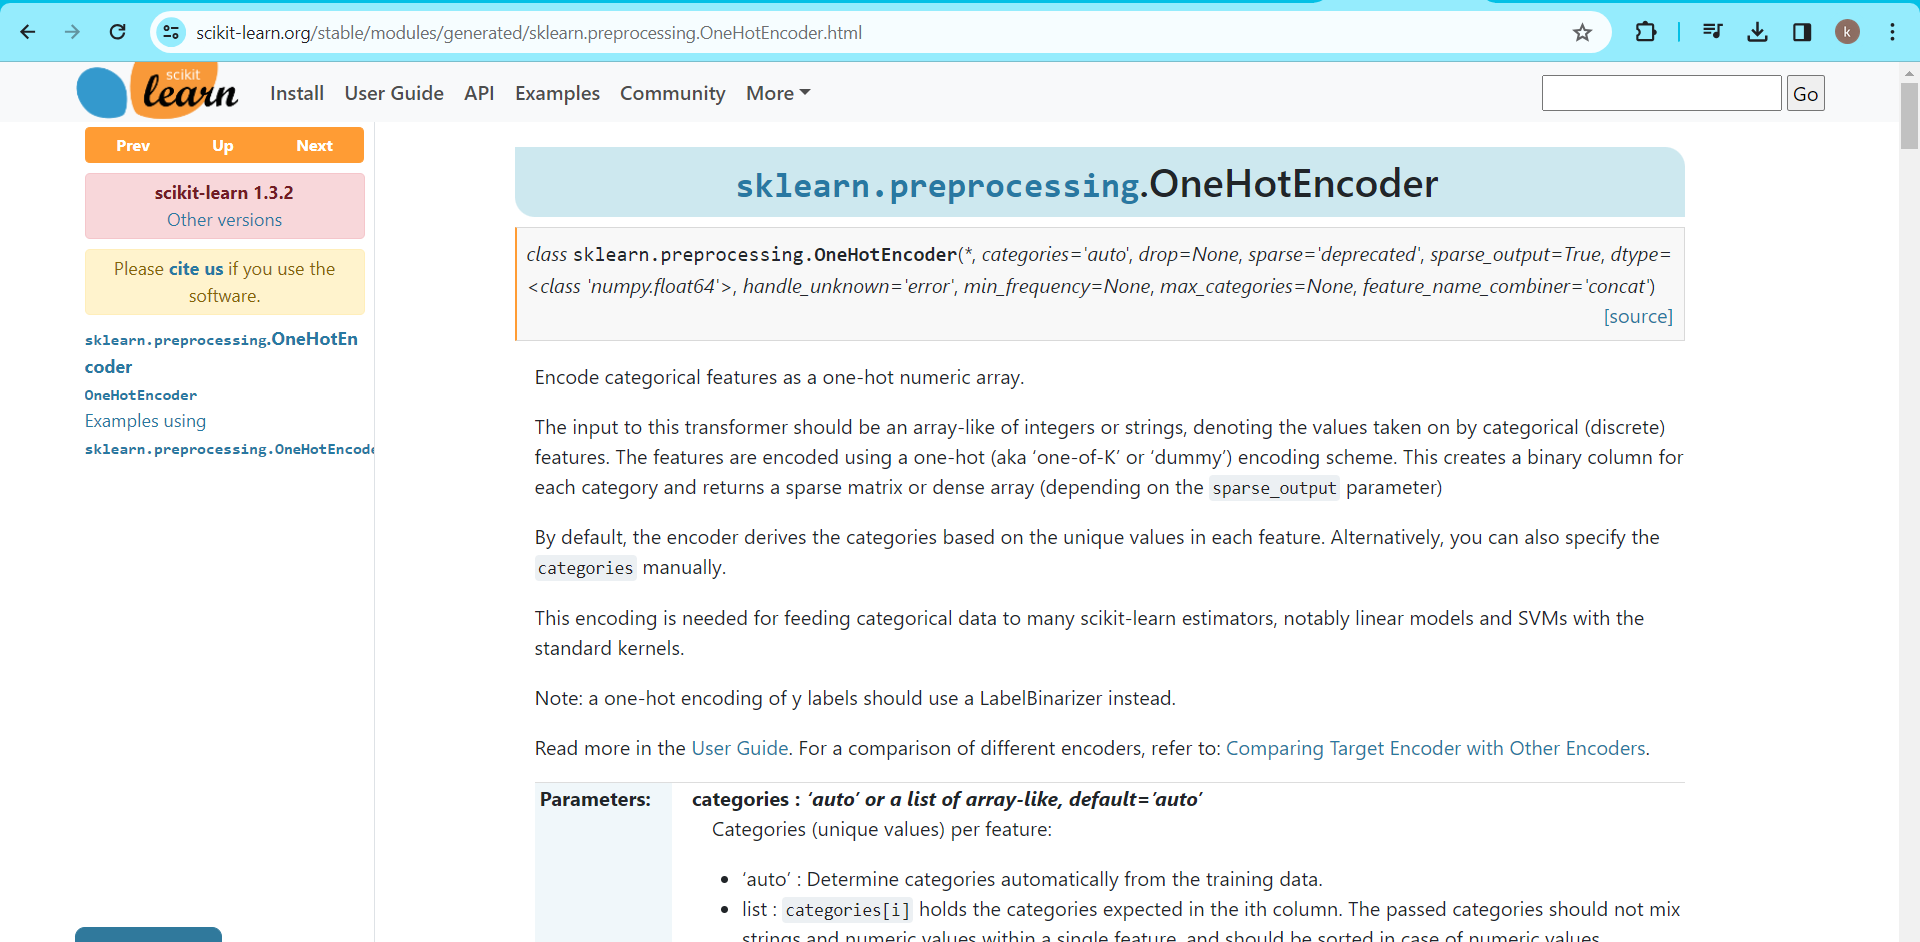

In [2]:
## Create a simple dataframe to understand the concept of nominal/OHE

df=pd.DataFrame({"color":["Red","Green","Blue","Red","Blue","Green"]})

In [3]:
df

,color
0,Red
1,Green
2,Blue
3,Red
4,Blue
5,Green


In [4]:
encoder=OneHotEncoder()

In [5]:
# perform fit and transform

encoder.fit(df)

OneHotEncoder()

In [6]:
encoder.transform(df) # As we discussed we got a sparsh matrix

<6x3 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [7]:
encoder.transform(df).toarray()

#Blue , green, red

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [8]:
## we can perform the fit and transform in one step

# encoder.fit_transform(df[["color"]])
# encoder.fit_transform(df[["color"]]).toarray()

In [9]:
encoded=encoder.transform(df).toarray()

In [10]:
encoded

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [11]:
encoder_df= pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

# Important step: columns=encoder.get_feature_names_out()

In [12]:
encoder_df

,color_Blue,color_Green,color_Red
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,0.0,1.0,0.0


In [13]:
# Finally we can concatenate the df with original df

df_final=pd.concat([df,encoder_df],axis=1)

In [14]:
df_final

,color,color_Blue,color_Green,color_Red
0,Red,0.0,0.0,1.0
1,Green,0.0,1.0,0.0
2,Blue,1.0,0.0,0.0
3,Red,0.0,0.0,1.0
4,Blue,1.0,0.0,0.0
5,Green,0.0,1.0,0.0


In [15]:
# If in future, you want to encode the new data then

encoder.transform([["Blue"]]).toarray()

C:\Users\Nethajimahendra K\Anaconda\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0.]])

In [16]:
encoder.transform([["Red"]]).toarray()

C:\Users\Nethajimahendra K\Anaconda\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[0., 0., 1.]])

In [17]:
# Assignment: perform the one hot encoding on below tips dataset

import seaborn as sns

sns.load_dataset("tips")

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [18]:
df= sns.load_dataset("tips")

In [19]:
# extracted the day column

df=df[["day"]]

In [20]:
df

,day
0,Sun
1,Sun
2,Sun
3,Sun
4,Sun
...,...
239,Sat
240,Sat
241,Sat
242,Sat


In [21]:
df["day"].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [22]:
# 4 unique columns so 4 columns will be created

encoder.fit_transform(df).toarray()

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],


In [23]:
# Checking on new data

encoder.transform([["Thur"]]).toarray()

C:\Users\Nethajimahendra K\Anaconda\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[0., 0., 0., 1.]])

In [24]:
# Try to encode multiple columns

df =sns.load_dataset("tips")

In [25]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [26]:
df= df[["sex","day"]]

In [27]:
df

,sex,day
0,Female,Sun
1,Male,Sun
2,Male,Sun
3,Male,Sun
4,Female,Sun
...,...,...
239,Male,Sat
240,Female,Sat
241,Male,Sat
242,Male,Sat


In [28]:
encoder.fit_transform(df[["sex","day"]])

<244x6 sparse matrix of type '<class 'numpy.float64'>'
	with 488 stored elements in Compressed Sparse Row format>

In [29]:
encoder.fit_transform(df[["sex","day"]]).toarray()

array([[1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 1.]])

In [30]:
# Frame a datframe

encoded= encoder.fit_transform(df[["sex","day"]]).toarray()
pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

,sex_Female,sex_Male,day_Fri,day_Sat,day_Sun,day_Thur
0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
239,0.0,1.0,0.0,1.0,0.0,0.0
240,1.0,0.0,0.0,1.0,0.0,0.0
241,0.0,1.0,0.0,1.0,0.0,0.0
242,0.0,1.0,0.0,1.0,0.0,0.0


In [31]:
# Finally we can concatenate the output to the original dataframe